<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/ESAA_YB3_%EB%AF%B8%EB%8B%88_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 라이브러리 및 데이터**

### 이 코드(↓) 한 번 돌린 뒤에 코랩 창 껐다가 다시 들어오기 (나눔바른고딕 폰트 설치) 그 뒤로는 돌리지 X

In [1]:
# 한글 폰트 설정
# 나눔 바른 고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
print("한글 폰트 설정 완료")

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
train=pd.read_csv('/content/drive/MyDrive/Colab/ESAA/movies_train.csv')

# **2. 탐색적 자료 분석**

**column: 제목, 배급사, 장르, 개봉일, 상영 시간, 상영 등급, 감독, dir_prev_bfnum, dir_prev_num, 스태프 수, 주연배우 수, 박스오피스 수**

- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

###**!! 그래프로 만들 수 있는 소재가 얼마나 나올지 말해보기(한 사람당 5개씩?)**

(이연수)

배급사와 박스 오피스 수와의 관계: 박스 오피스 수가 배급사의 영향을 받을지?

장르와 주연배우 수와의 관계: 장르마다 주연배우 수가 얼마나 필요할지? 아니면 영향을 받지 않을지??

개봉일과 상영 시간의 관계: 연도에 따라 상영 시간에 관련된 유행이 있을까?

감독과 상영 시간의 관계: 감독마다 상영 시간이 비슷할지? 아니면 좀 다를지?

감독과 박스 오피스 수의 관계: 특정 감독일 때 사람들이 더 영화를 많이 볼까?

(편한비)

이전 영화의 평균 관객수와 주연 배우수의 관계 - 주연배우가 많을수록 관객수가 많다?

참여한 영화의 갯수와 상영시간의 관계 - 참여한 영화 개수가 많을수록 상영시간이 짧다?

개봉일과 장르의 분포 관계 - 여름에 호러 영화가 많을것이다?

배급사와 상영등급의 관계 - 배급사별로 선호하는 상영등급이 있을것이다?

관객수와 참여한 영화 개수 - 영화 개수가 많을수록 관객수가 높을 것이다?

(권미성)

- 상영 시간과 박스오피스 수의 관계 : 사람들이 선호하는 상영시간이 있을까?

- 스태프 수와 박스오피스 수의 관계 : 스태프의 수가 흥행에 영향을 줄까?

- 상영 등급과 장르 : 상영 등급에 따른 장르의 차이가 있을까?

- 이전 영화 수와 장르의 관계 : 감독의 경력에 따라 선호하는 장르가 있을까?

- 개봉일과 박스오피스 수의 관계 : 사람들이 영화를 특히 많이 보는 기간이 있을까?

(심유희)

1. 스태프 수와 주연 배우 수의 관계 - 스태프가 많은 영화일수록 주연 배우가 많은지

2. 배급사와 장르의 관계 - 특정 배급사가 어떤 장르에 집중하는지

3. 상영 등급과 상영 시간의 관계 - 청불 영화가 더 길게 제작되는지 또는 전체 관람가 영화가 더 짧게 제작되는지

4. 개봉시기와 스태프 수(또는 주연배우 수)의 관계 - 성수기 영화일수록 스태프 수(또는 주연배우 수)가 많은 대규모 작품인지

5. 감독의 참여 영화수(dir_prev_num)와 이번 영화의 주연 배우 수의 관계 - 경험이 많은 감독일수록 배우 캐스팅 규모가 큰지

6. 감독의 이전 영화 평균 관객수(dir_prev_bfnum)와 이번 영화의 박스오피스 수 관계 - 감독의 과거 영화 성적이 이번 영화 성적에 얼마나 영향을 주는지

In [23]:
train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [24]:
# 행과 열 수
train.shape

(600, 12)

In [25]:
# 요약
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [27]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


num_staff가 0인 거 : 왜 아무도 없지? : 보통 독립 영화!

num_staff가 max인 거 : 저렇게 많이 필요했나? : 많이 필요했을 것 같은 영화..

num_actor가 0인 거: 배우를 아무도 안 쓸 수가 있나? : 다큐멘터리가 대부분

num_actor가 max인 거: 주인공 많이 필요했구나 싶긴 했지만 그래도 확인만 해봄

**보고 추가로 이상한 점 있으면 알려줭**

In [28]:
# num_staff가 max였던 영화
train.loc[train.num_staff.idxmax()]

,372
title,국제시장
distributor,CJ 엔터테인먼트
genre,드라마
release_time,2014-12-17
time,126
screening_rat,12세 관람가
director,윤제균
dir_prev_bfnum,NaN
dir_prev_num,0
num_staff,869


In [29]:
# num_staff가 0인 영화 >> 독립영화 같음.. box_off_num의 수가 크지 않음.
train[train.num_staff==0]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
11,무서운 집,(주)콘텐츠 윙,공포,2015-07-30,98,12세 관람가,양병간,NaN,0,0,1,1079
22,원령,조이앤시네마,공포,2015-08-13,91,15세 관람가,동지견,NaN,0,0,1,914
27,러브앤서울 복숭아마을 도색소동기,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
75,원 오브 어 카인드 3D,골든타이드픽처스,뮤지컬,2013-10-31,93,전체 관람가,손석,NaN,0,0,1,8083
87,먹이사슬,노바엔터테인먼트,멜로/로맨스,2014-09-17,100,청소년 관람불가,한동호,NaN,0,0,6,2070
88,야누스: 욕망의 두 얼굴,(주)패스파인더씨앤씨,미스터리,2014-08-14,83,청소년 관람불가,손영국,332.00,1,0,3,4122
125,하쿠나 마타타 - 지라니 이야기,이모션 픽처스,다큐멘터리,2010-12-09,90,전체 관람가,이창규,NaN,0,0,6,1253
173,법정스님의 의자,(주)키노아이,다큐멘터리,2011-05-12,75,전체 관람가,임성구,NaN,0,0,2,9438
191,꾸루꾸루와 친구들: 무지개 나무의 비밀,(주)팝엔터테인먼트,애니메이션,2015-11-19,74,전체 관람가,문제대,NaN,0,0,4,7408


In [30]:
# num_actor가 max였던 영화
train.loc[train.num_actor.idxmax()]

,80
title,바비
distributor,(주) 케이알씨지
genre,드라마
release_time,2010-02-04
time,116
screening_rat,15세 관람가
director,에밀리오 에스테베즈
dir_prev_bfnum,NaN
dir_prev_num,0
num_staff,19


In [31]:
# num_actor기 0인 영화 >> 독립영화 같음.. 다큐멘터리의 비중이 크고 box_off_num이 크지 않음.
train[train.num_actor==0]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
107,미국의 바람과 불,시네마 달,다큐멘터리,2012-07-26,118,15세 관람가,김경만,NaN,0,6,0,652
167,모래가 흐르는 강,시네마 달,다큐멘터리,2013-03-28,75,전체 관람가,지율스님,NaN,0,11,0,10942
168,망대,골든타이드픽처스,다큐멘터리,2015-03-12,66,전체 관람가,문승욱,NaN,0,13,0,65
355,오디세오,(주)패뷸러스,뮤지컬,2015-10-22,80,전체 관람가,정성복,NaN,0,0,0,862
391,명령불복종 교사,인디플러그,다큐멘터리,2015-05-14,96,전체 관람가,서동일,NaN,0,3,0,1827
418,오월愛,상구네 필름,다큐멘터리,2011-05-12,104,전체 관람가,김태일,NaN,0,4,0,4092
425,보라,시네마달,다큐멘터리,2011-11-24,136,전체 관람가,이강현,NaN,0,7,0,389
437,나쁜 나라,(주)시네마달,다큐멘터리,2015-12-03,120,12세 관람가,김진열,NaN,0,2,0,21576
456,"60년전, 사선에서",인터콘미디어,다큐멘터리,2010-06-24,63,전체 관람가,박성미,NaN,0,10,0,79


In [32]:
# 결측치 확인
train.isna().sum()
# dir_prev_bfnum의 결측치가 330.

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


dir_prev_bfnum의 결측치가 330 : 감독 전 작품의 관객 수가 NaN

> 결측치 특성을 봤더니 감독의 전 작품이 없는 경우!

> 그냥 관객 수도 0으로 만들기 (이건 예시 자료 보면서 한 전처리)

In [33]:
# 결측치 특성
train[train.dir_prev_bfnum.isna()].head(5)
# dir_prev_dfnum이 na이면 dir_prev_num이 0이다. 감독의 이전 작품이 없다.

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [34]:
train[train.dir_prev_bfnum.isna()].dir_prev_num.sum() # dir_prev_dfnum인 작품의 dir_prev_num의 합이 0. 감독의 이전 작품이 없다.

np.int64(0)

In [35]:
# dir_prev_dfnum이 na인 걸 0으로 바꾸기.
train.dir_prev_bfnum.fillna(0,inplace=True)
train.dir_prev_bfnum.isna().sum() # na 없음.

np.int64(0)

In [36]:
train.release_time=pd.to_datetime(train.release_time)
train.release_time.head(5)

,release_time
0,2012-11-22
1,2015-11-19
2,2013-06-05
3,2012-07-12
4,2010-11-04


# **여기까지 전처리!**

이 밑부터는 EDA하는 중

## **각 col별 특징**

### **배급사 특징**

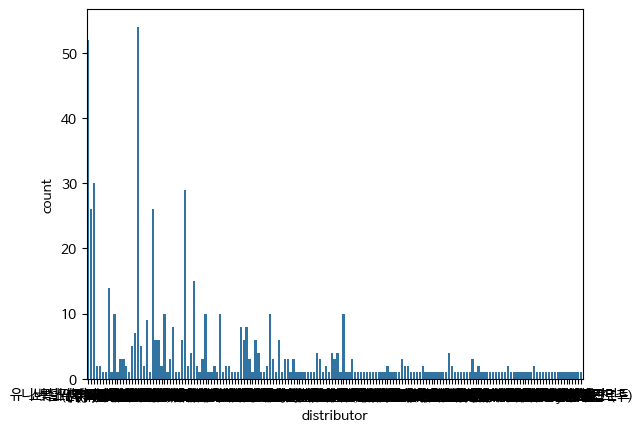

In [37]:
sns.countplot(x='distributor',data=train)
plt.show()

In [ ]:
train.distributor.value_counts() # distributor별 count

,count
distributor,
CJ 엔터테인먼트,54
롯데엔터테인먼트,52
(주)NEW,30
(주)마운틴픽쳐스,29
(주)쇼박스,26
...,...
영화사 廊,1
크리에이티브컴즈(주),1
ysfilm,1


In [ ]:
# 상위 10개의 distributor만 가져오기.
top10_distributor=train.distributor.value_counts().head(10)
print(top10_distributor)

distributor
CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
시너지          10
(주)키노아이      10
Name: count, dtype: int64


In [ ]:
# 상위 10개 distributor의 행
top10_distributor_names=train.distributor.value_counts().head(10).index.tolist()
top10_distributor_names

top10_distributor_df=train[train.distributor.isin(top10_distributor_names)]
top10_distributor_df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


## **배급사와 박스오피스 수 관계**

배급사별로 max box off num을 구하자

In [ ]:
train.groupby('distributor')
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [ ]:
train_sorted_by_distributor = train.sort_values(by='distributor').reset_index(drop=True) # 배급사끼리 묶기
train_sorted_by_distributor

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,관계,(주) 브릿지웍스,멜로/로맨스,2014-08-27,91,청소년 관람불가,김명서,0.0,0,57,3,2146
1,사토미를 찾아라,(주) 브릿지웍스,코미디,2014-10-16,88,청소년 관람불가,New Pistol,0.0,0,48,8,2595
2,미스체인지,(주) 브릿지웍스,코미디,2013-09-05,100,청소년 관람불가,정초신,813164.0,1,75,4,6054
3,캠퍼스 S 커플,(주) 액티버스엔터테인먼트,멜로/로맨스,2014-05-15,108,청소년 관람불가,송창용,664267.0,2,66,4,891
4,굿바이 그리고 헬로우,(주) 액티버스엔터테인먼트,드라마,2015-12-24,82,12세 관람가,한창근,0.0,0,23,4,329
...,...,...,...,...,...,...,...,...,...,...,...,...
595,미션스쿨,홀리가든,드라마,2015-10-15,62,12세 관람가,강의석,0.0,0,3,2,152
596,인 허 플레이스,홀리가든,드라마,2015-12-17,115,청소년 관람불가,알버트 신,0.0,0,28,3,1599
597,"앵두야, 연애하자",홀리가든,드라마,2013-06-06,98,15세 관람가,정하린,0.0,0,34,4,3177
598,결정적 한방,화앤담이엔티,드라마,2011-12-07,100,15세 관람가,박중구,0.0,0,237,4,60944


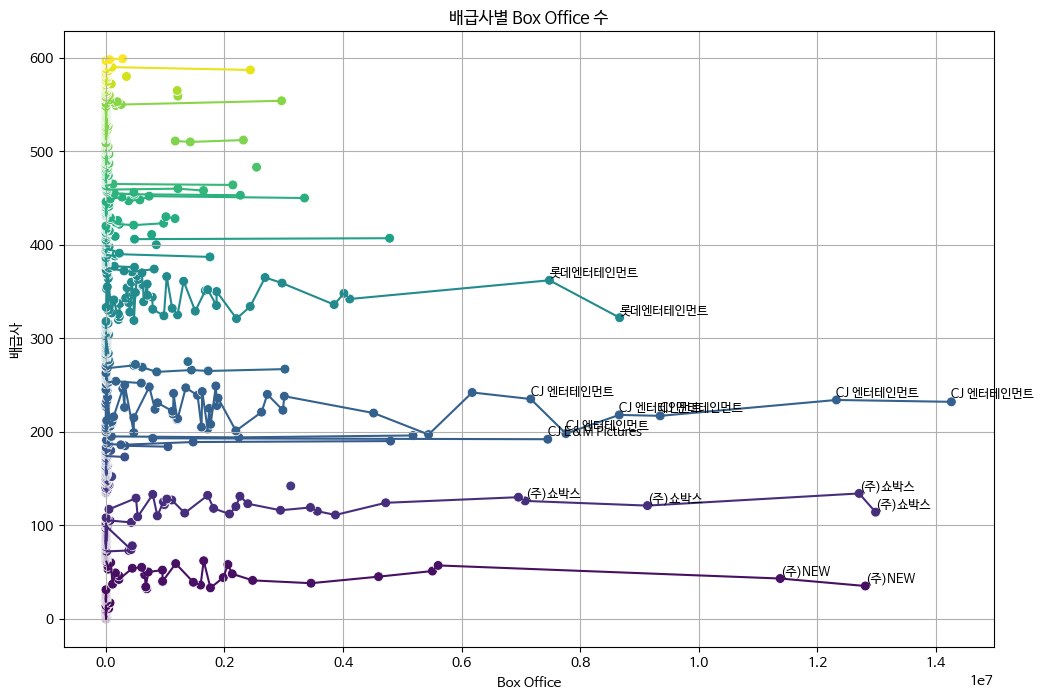

In [ ]:
# 전체 배급사를 기준으로 한 Box Office

plt.figure(figsize=(12,8))
sns.lineplot(data=train_sorted_by_distributor,x='box_off_num',y=train_sorted_by_distributor.index,hue='distributor',palette='viridis',legend=False)
sns.scatterplot(data=train_sorted_by_distributor,x='box_off_num',y=train_sorted_by_distributor.index,hue='distributor',palette='viridis',legend=False,s=50)
top_15_box_off=train_sorted_by_distributor.nlargest(15,'box_off_num')
for index, row in top_15_box_off.iterrows():
  plt.text(row['box_off_num'],row.name,row['distributor'],fontsize=9,ha='left',va='bottom')
plt.title('배급사별 Box Office 수')
plt.xlabel('Box Office')
plt.ylabel('배급사')
plt.grid(True)
plt.show()

In [ ]:
top10_distributor_df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


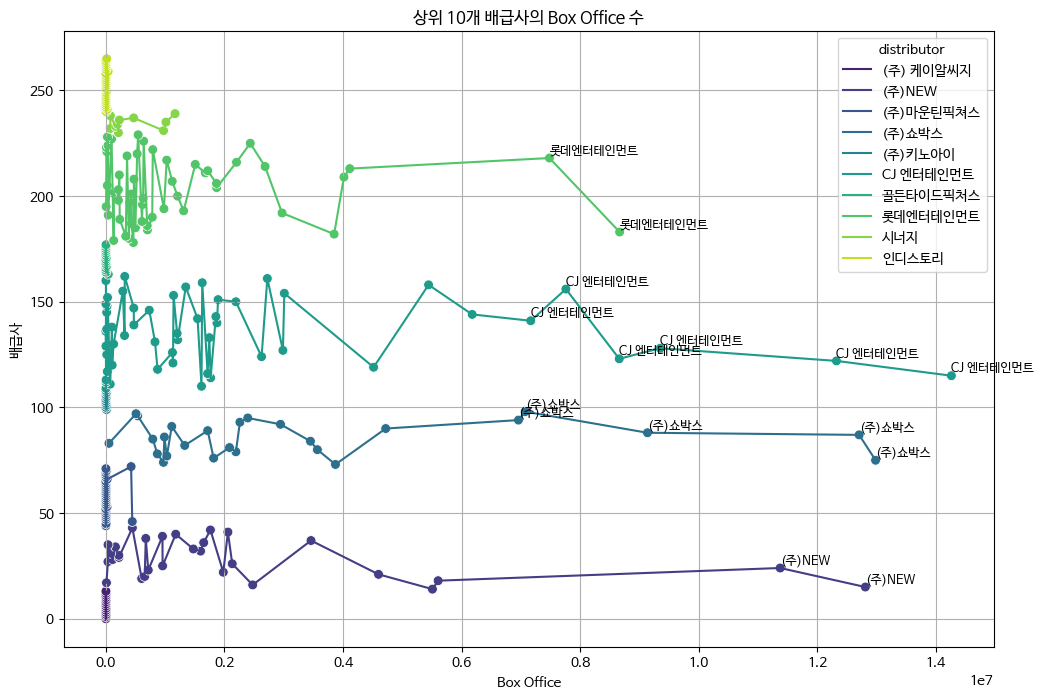

In [ ]:
# 상위 10개 배급사를 기준으로 한 Box office

train_sorted_by_distributor10=top10_distributor_df.sort_values(by='distributor').reset_index(drop=True) # 배급사끼리 묶기
train_sorted_by_distributor10

plt.figure(figsize=(12,8))
sns.lineplot(data=train_sorted_by_distributor10,x='box_off_num',y=train_sorted_by_distributor10.index,hue='distributor',palette='viridis',legend='full')
sns.scatterplot(data=train_sorted_by_distributor10,x='box_off_num',y=train_sorted_by_distributor10.index,hue='distributor',palette='viridis',legend=False,s=50)
top_15_box_off=train_sorted_by_distributor10.nlargest(15,'box_off_num')
for index, row in top_15_box_off.iterrows():
  plt.text(row['box_off_num'],row.name,row['distributor'],fontsize=9,ha='left',va='bottom')
plt.title('상위 10개 배급사의 Box Office 수')
plt.xlabel('Box Office')
plt.ylabel('배급사')
plt.grid(True)
plt.show()

# **장르 특징**

In [ ]:
train.genre.value_counts() # 장르별 count

,count
genre,
드라마,221
다큐멘터리,93
멜로/로맨스,78
코미디,53
공포,42
액션,28
느와르,27
애니메이션,21
미스터리,17


어떤 계절에 어떤 장르 영화가 나왔는지 보자

In [ ]:
train.describe()

,release_time,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600,600.000000,6.000000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,2013-04-16 10:12:00,100.863333,4.726993e+05,0.876667,151.118333,3.706667,7.081818e+05
min,2010-01-02 00:00:00,45.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,2011-10-11 06:00:00,89.000000,0.000000e+00,0.000000,17.000000,2.000000,1.297250e+03
50%,2013-07-17 12:00:00,100.000000,0.000000e+00,0.000000,82.500000,3.000000,1.259100e+04
75%,2014-10-16 00:00:00,114.000000,3.761416e+05,2.000000,264.000000,4.000000,4.798868e+05
max,2015-12-31 00:00:00,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07
std,NaN,18.097528,1.309474e+06,1.183409,165.654671,2.446889,1.828006e+06


In [ ]:
train.release_time.head(5)

,release_time
0,2012-11-22
1,2015-11-19
2,2013-06-05
3,2012-07-12
4,2010-11-04


In [ ]:
train['release_month']=train.release_time.dt.month
print(train.release_month.head(5))

0    11
1    11
2     6
3     7
4    11
Name: release_month, dtype: int32


AttributeError: 'Series' object has no attribute 'counts_values'

<Figure size 1200x800 with 0 Axes>

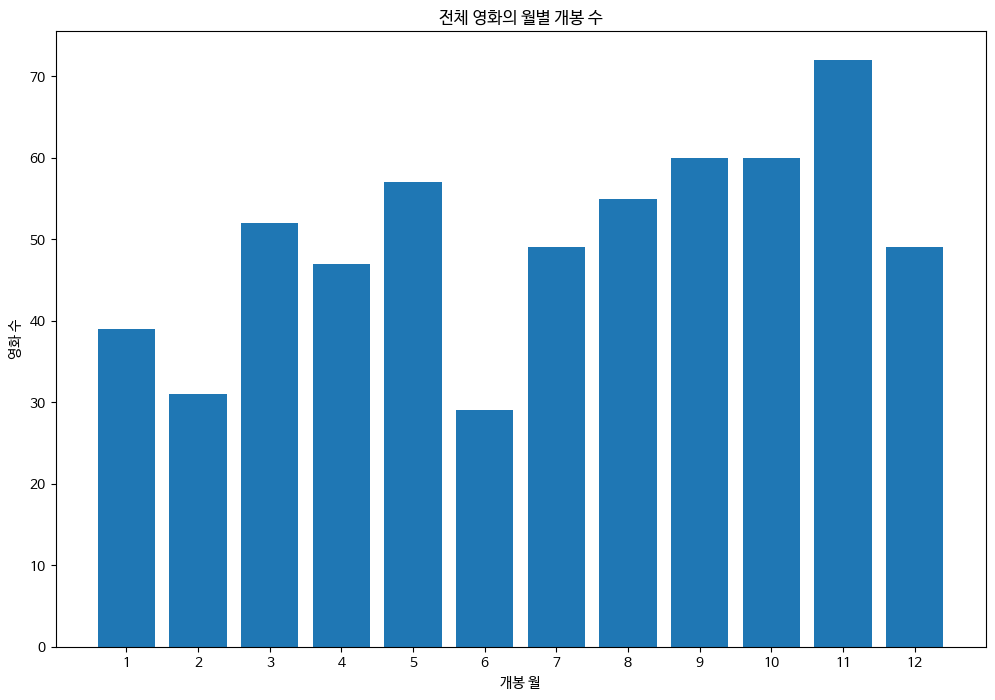

In [ ]:
# 전체 영화의 월별 개봉 수 계산
all_movies_monthly_counts = train.release_month.value_counts().sort_index()

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
plt.bar(x=all_movies_monthly_counts.index, height=all_movies_monthly_counts.values)
plt.title('전체 영화의 월별 개봉 수')
plt.xlabel('개봉 월')
plt.ylabel('영화 수')
plt.xticks(all_movies_monthly_counts.index) # 모든 월을 x축에 표시
plt.show()

### 11월 개봉이 가장 많음 뭐가 있나?

### 6월은 좀 많이 적음

월 추출을 했으니까 이제 장르별 월의 개수를 구하자

In [ ]:
train.groupby(['genre','release_month']).size()

genre  release_month
SF     2                1
       3                3
       7                1
       8                6
       11               1
                       ..
코미디    8                4
       9                6
       10               6
       11               5
       12               4
Length: 110, dtype: int64

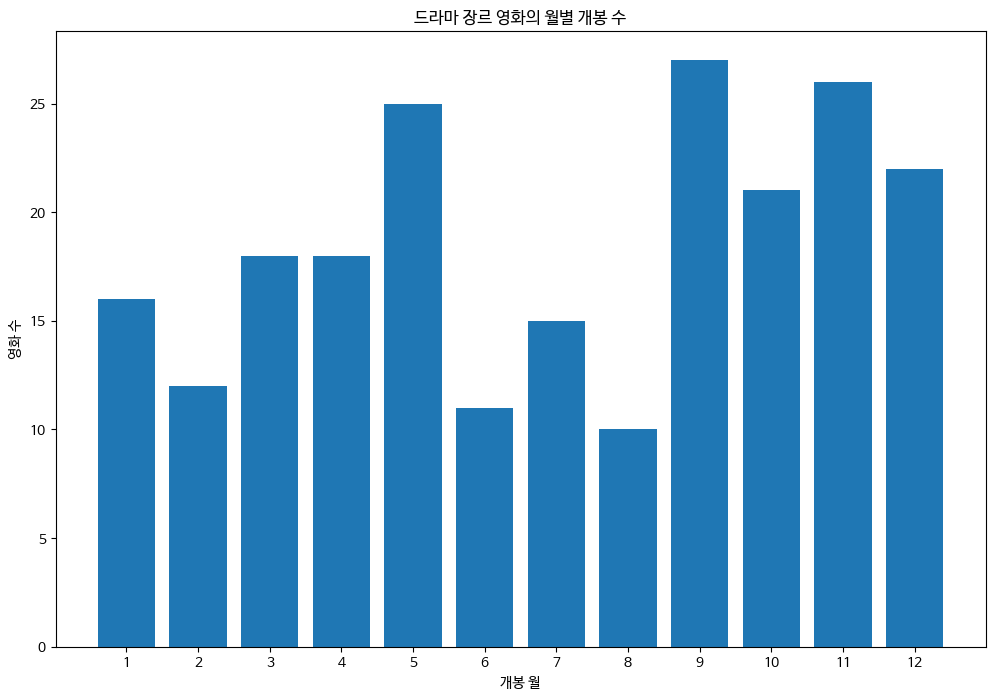

In [ ]:
# 장르가 드라마인 것부터 realse_month 비교
drama_monthly_counts=train[train.genre=='드라마'].release_month.value_counts().sort_index()
# 이걸 그래프로 만들자
plt.figure(figsize=(12,8))
plt.bar(x=drama_monthly_counts.index, height=drama_monthly_counts.values)
plt.title('드라마 장르 영화의 월별 개봉 수') # Add a title
plt.xlabel('개봉 월') # Add x-axis label
plt.ylabel('영화 수') # Add y-axis label
plt.xticks(drama_monthly_counts.index) # Ensure all months are shown on the x-axis
plt.show()

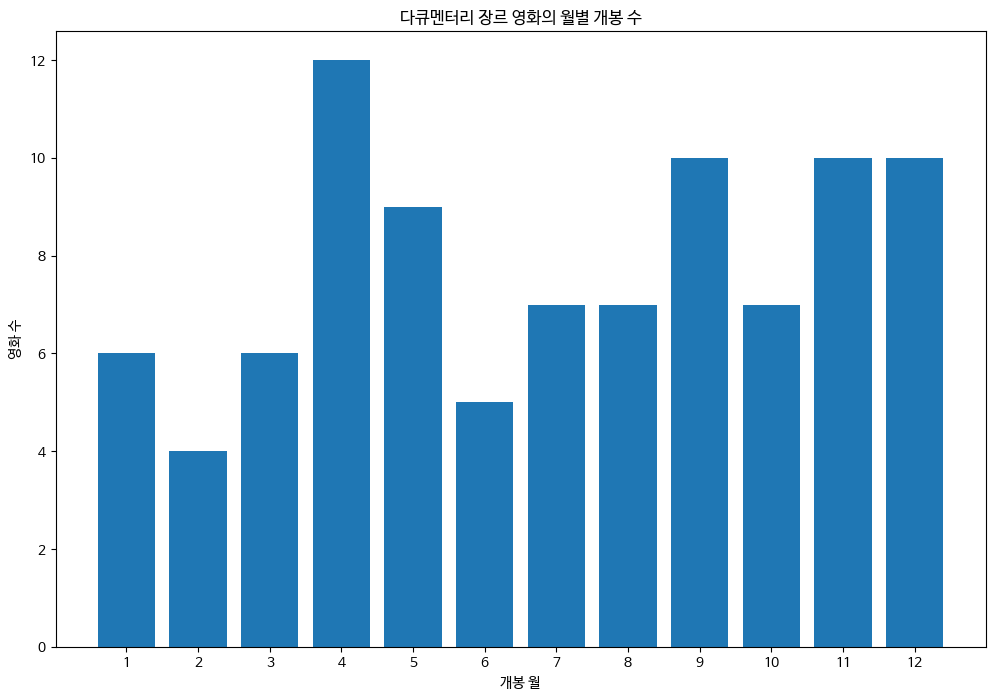

In [ ]:
# 장르가 다큐멘터리
documentary_monthly_counts=train[train.genre=='다큐멘터리'].release_month.value_counts().sort_index()
# 이걸 그래프로 만들자
plt.figure(figsize=(12,8))
plt.bar(x=documentary_monthly_counts.index, height=documentary_monthly_counts.values)
plt.title('다큐멘터리 장르 영화의 월별 개봉 수') # Add a title
plt.xlabel('개봉 월') # Add x-axis label
plt.ylabel('영화 수') # Add y-axis label
plt.xticks(documentary_monthly_counts.index) # Ensure all months are shown on the x-axis
plt.show()

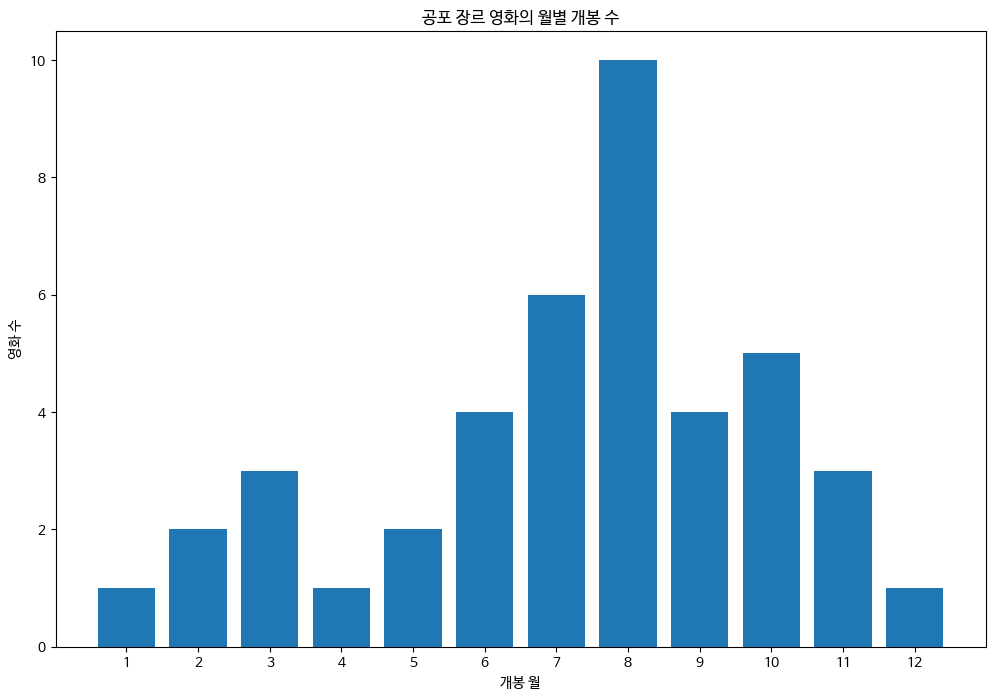

In [ ]:
# 공포영화
horror_monthly_counts=train[train.genre=='공포'].release_month.value_counts().sort_index()
# 이걸 그래프로 만들자
plt.figure(figsize=(12,8))
plt.bar(x=horror_monthly_counts.index, height=horror_monthly_counts.values)
plt.title('공포 장르 영화의 월별 개봉 수') # Add a title
plt.xlabel('개봉 월') # Add x-axis label
plt.ylabel('영화 수') # Add y-axis label
plt.xticks(horror_monthly_counts.index) # Ensure all months are shown on the x-axis
plt.show()

### 호러 영화는 8월이 확실히 많다 > 여름

### 관객수랑 장르와 관계?

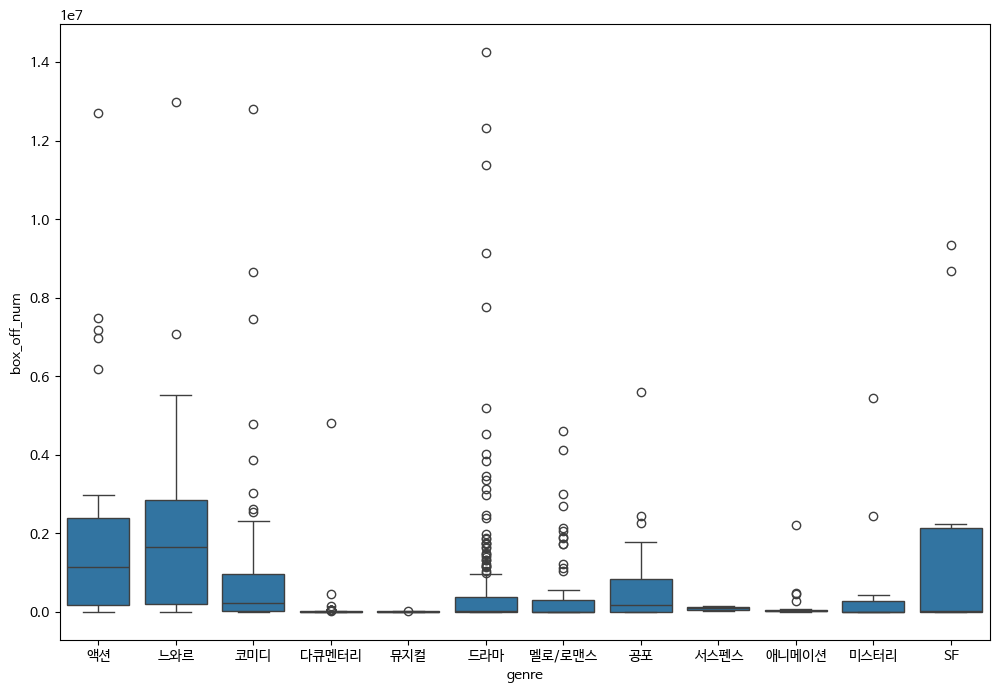

In [ ]:
# 상자수염그림을 그리자
plt.figure(figsize=(12,8))
sns.boxplot(x='genre',y='box_off_num',data=train)
plt.show()

큰 관계 없는 것 같기도?

## **상영 시간 특징**

In [ ]:
train.time.dtype

dtype('int64')

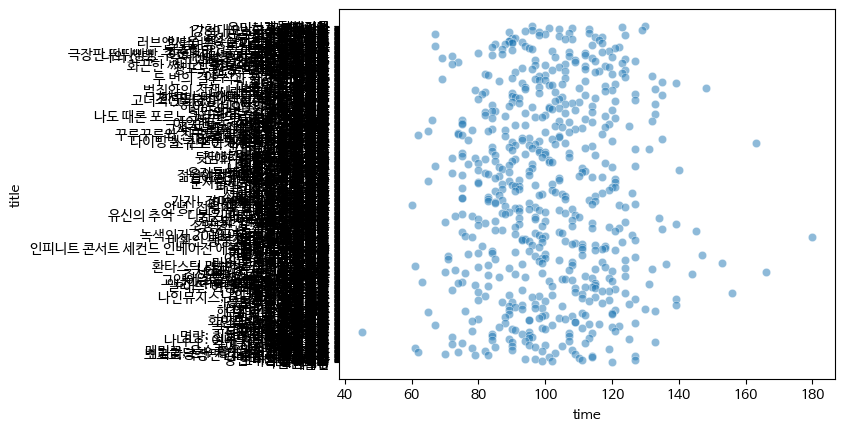

In [ ]:
sns.scatterplot(x='time',y='title',data=train,alpha=0.5)
plt.show()

### 장르마다 비슷하게 나타날까?

In [ ]:
# 장르마다 상영 시간이 비슷하게 나타날지??
train.groupby('genre').time.mean()

,time
genre,
SF,101.384615
공포,100.214286
느와르,115.370370
다큐멘터리,88.053763
드라마,104.651584
멜로/로맨스,96.641026
뮤지컬,107.000000
미스터리,102.588235
서스펜스,112.000000


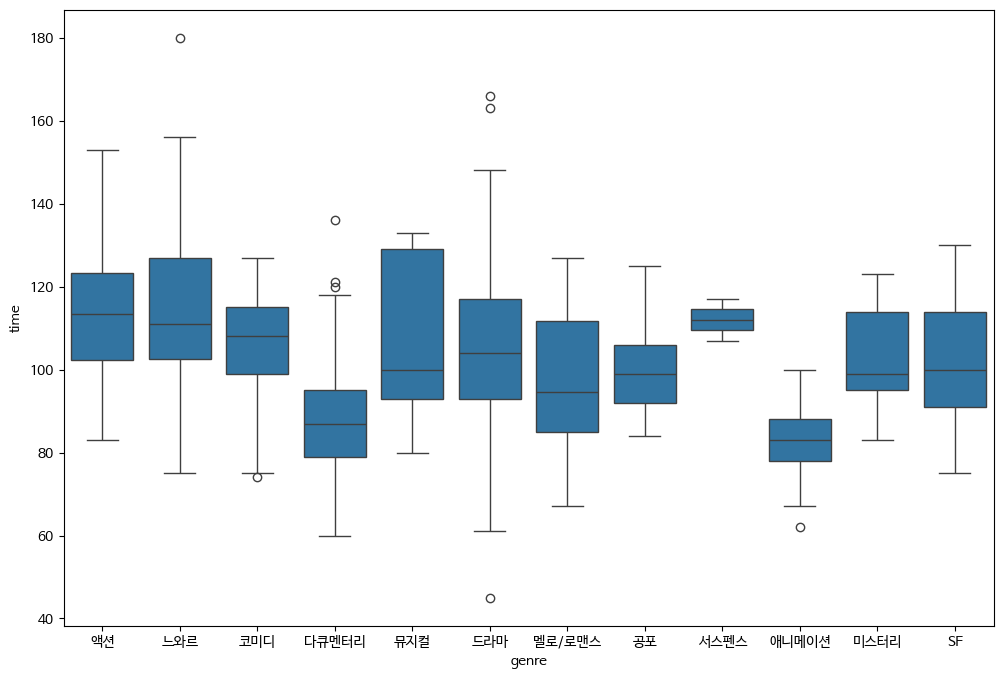

In [ ]:
# 이것마다의 상자수염그림을 그리자

plt.figure(figsize=(12,8))
sns.boxplot(x='genre',y='time',data=train)
plt.show()

### 상영시간과 관객수에 관계가 있을까?

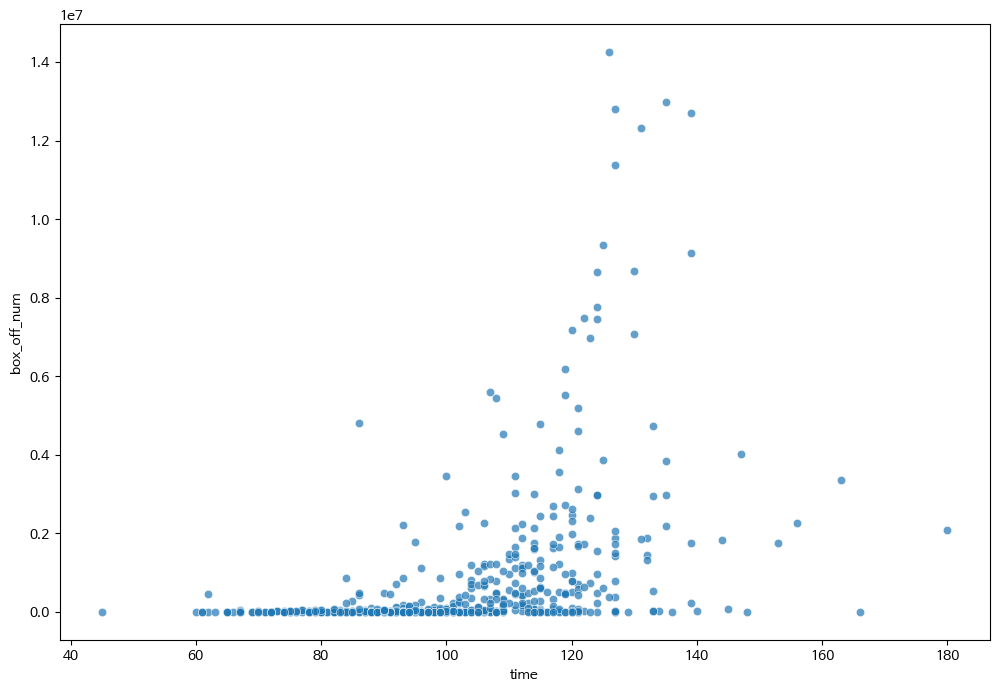

In [ ]:
# 상영시간을 x축, 관객수를 y축으로 놓고 산점도 그려보자
plt.figure(figsize=(12,8))
sns.scatterplot(x='time',y='box_off_num',data=train,alpha=0.7)
plt.show()

엄청난 관계는 없는데 일단 120~140분 사이에서 box_off_num이 많았다.

## **개봉일과 상영시간 간의 특징**

In [ ]:
# 개봉일을 연도로 나타내기
train['release_year']=train.release_time.dt.year
train.release_year.head(5)

,release_year
0,2012
1,2015
2,2013
3,2012
4,2010


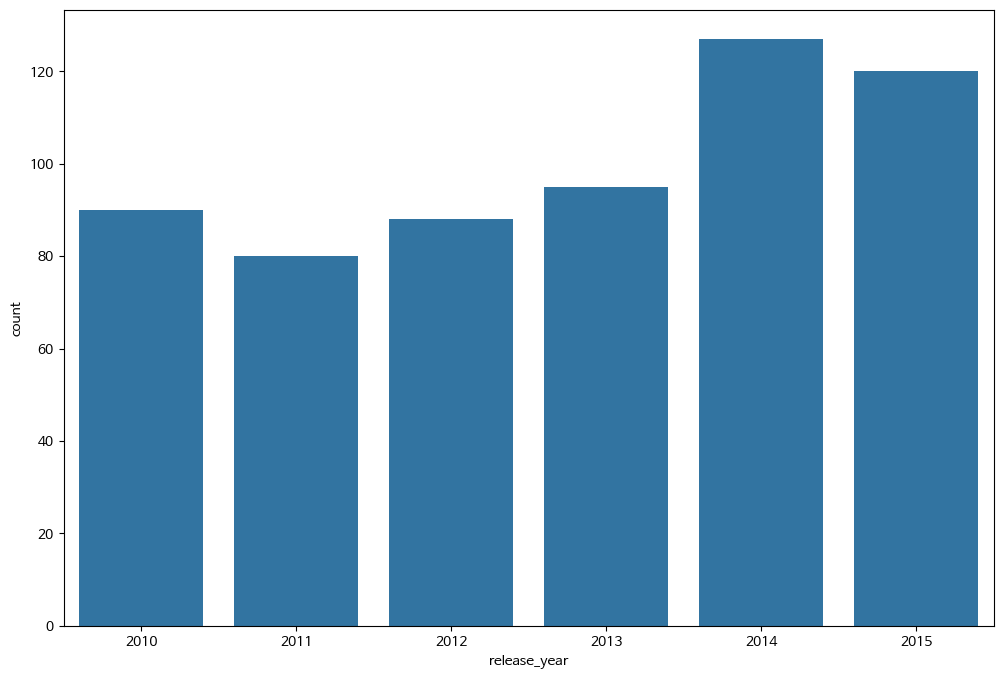

In [ ]:
# 개봉 연도마다 영화 개수
plt.figure(figsize=(12,8))
sns.countplot(x='release_year',data=train)
plt.show()

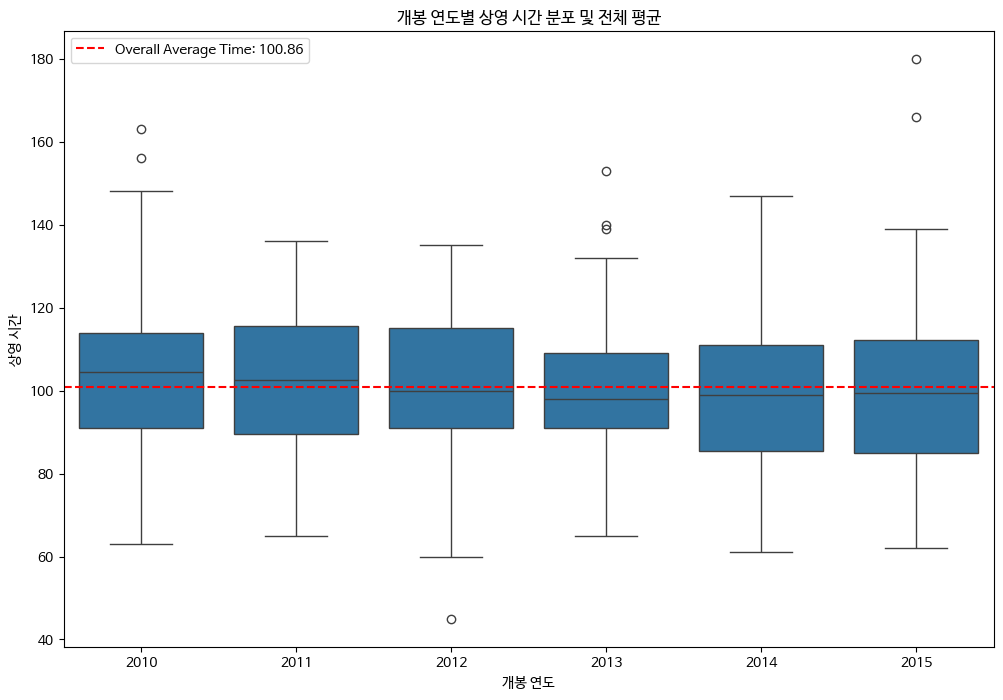

In [ ]:
# 개봉 연도마다 상영 시간이 어떻게 되는지
plt.figure(figsize=(12,8))
sns.boxplot(x='release_year',y='time',data=train)

# 전체 상영 시간의 평균을 각각의 박스플랏마다 추가하기
avg_time = train.time.mean()
plt.axhline(avg_time, color='red', linestyle='--', label=f'Overall Average Time: {avg_time:.2f}')

plt.title('개봉 연도별 상영 시간 분포 및 전체 평균')
plt.xlabel('개봉 연도')
plt.ylabel('상영 시간')
plt.legend()
plt.show()

## **관람가**

In [ ]:
train.screening_rat.value_counts()

,count
screening_rat,
청소년 관람불가,204
15세 관람가,202
12세 관람가,102
전체 관람가,92


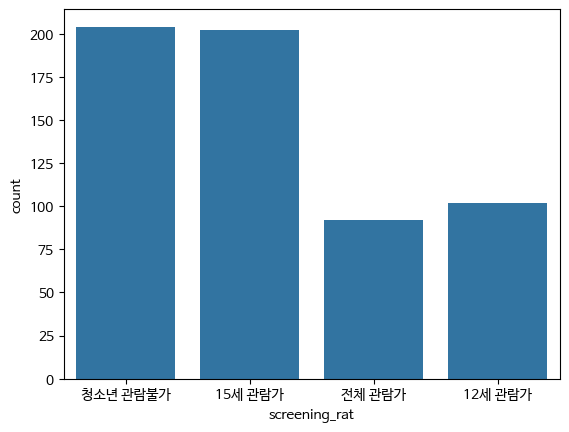

In [ ]:
sns.countplot(x='screening_rat',data=train)
plt.show()
# 순서대로 청불, 15세, 전체, 12세

## **박스오피스 숫자(관객수)**

In [ ]:
train.box_off_num

,box_off_num
0,23398
1,7072501
2,6959083
3,217866
4,483387
...,...
595,1475091
596,1716438
597,2475
598,2192525


## **감독**

In [ ]:
train.director.value_counts()

,count
director,
홍상수,7
우민호,4
전규환,4
신재호,4
장률,4
...,...
정윤석,1
이성은,1
권오광,1


In [ ]:
# box_off_num이 가장 큰 사람부터 나열

train.sort_values(by='box_off_num',ascending=False).head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_month
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0.000000e+00,0,869,4,14262766,12
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,2.564692e+06,3,462,10,12983841,7
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,8.190495e+05,2,300,8,12811435,1
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,5.169479e+06,4,628,3,12706663,7
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,1.552541e+06,2,402,3,12323595,9
122,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,0.000000e+00,0,311,5,11374879,12
496,설국열차,CJ 엔터테인먼트,SF,2013-08-01,125,15세 관람가,봉준호,0.000000e+00,0,67,10,9350351,8
101,관상,(주)쇼박스,드라마,2013-09-11,139,15세 관람가,한재림,1.242778e+06,2,298,6,9135806,9
505,해적: 바다로 간 산적,롯데엔터테인먼트,SF,2014-08-06,130,12세 관람가,이석훈,1.843895e+06,3,868,2,8666208,8
476,수상한 그녀,CJ 엔터테인먼트,코미디,2014-01-22,124,15세 관람가,황동혁,2.781990e+06,2,437,5,8659725,1


# **여기부터 시각화**

## **스태프 수 - 주연배우 수**

In [38]:
train2=train.copy()

Text(0, 0.5, '주연배우 수')

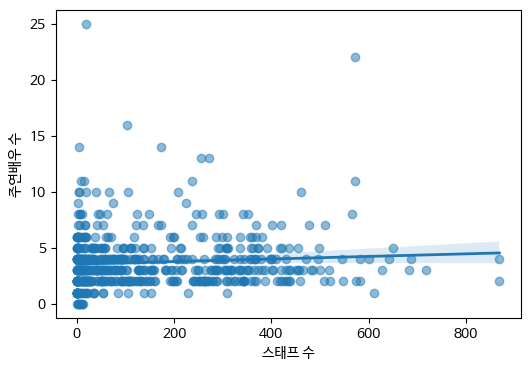

In [41]:
x,y='num_staff','num_actor'
# 산점도+회귀선
fig,ax=plt.subplots(figsize=(6,4))
sns.regplot(data=train2,x=x,y=y,scatter_kws={'alpha':0.5},line_kws={'linewidth':2},ax=ax)
plt.xlabel("스태프 수")
plt.ylabel("주연배우 수")

1. 대부분의 영화는 스태프 수가 0~300명 사이에 몰려 있다.
2. 대부분의 영화는 주연 배우 수가 0~5명에 집중되어 있다.
3. 회귀선이 거의 수평에 가까운 것으로 볼 때 스태프 수가 많아진다고 해서 주연 배우 수가 크게 늘어나지는 않는 것으로 보인다.


### 주연 배우 수가 0~5인 범위에서 각각의 주연 배우 수에는 스태프 수가 얼마나 필요한지 평균적으로 보자.

In [48]:
# 주연 배우 수가 0~5인 범위
train_actor05=train2[(train2.num_actor>=0) & (train2.num_actor<=5)]
train_actor05

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
5,강철대오 : 구국의 철가방,롯데엔터테인먼트,코미디,2012-10-25,113,15세 관람가,육상효,837969.00,2,262,4,233211
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,0.00,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,0.00,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


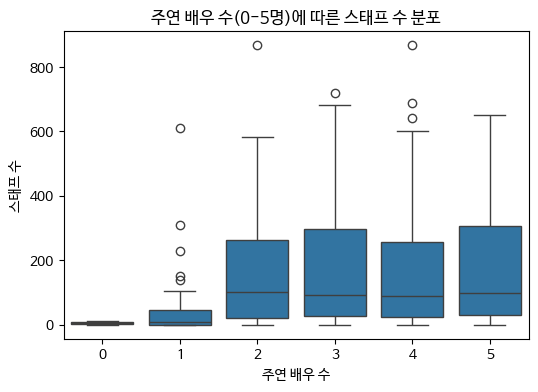

In [53]:
plt.figure(figsize=(6,4))
sns.boxplot(x='num_actor',y='num_staff',data=train_actor05)
plt.title('주연 배우 수(0-5명)에 따른 스태프 수 분포')
plt.xlabel('주연 배우 수')
plt.ylabel('스태프 수')
plt.show()

1. 주연 배우 수가 0일 때(다큐멘터리) 스태프가 특별히 필요하지 않다.
2. 주연 배우 수가 1명일 때와 주연 배우 수가 2 ~ 5명일 때는 다른 추세를 나타낸다. 주연 배우 수가 1명일 때는 2 ~ 5명일 때보다 스태프 수가 적어도 좋다.
3. 주연 배우 수가 2 ~ 5명일 때는 유사한 추세를 나타낸다. 중앙값은 약 100명 이내이며, 대체로 그보다 적은 스태프 수를 필요로 한다.

## 상영 시간 - 박스 오피스 수

In [55]:
print(train.time.describe())

count    600.000000
mean     100.863333
std       18.097528
min       45.000000
25%       89.000000
50%      100.000000
75%      114.000000
max      180.000000
Name: time, dtype: float64


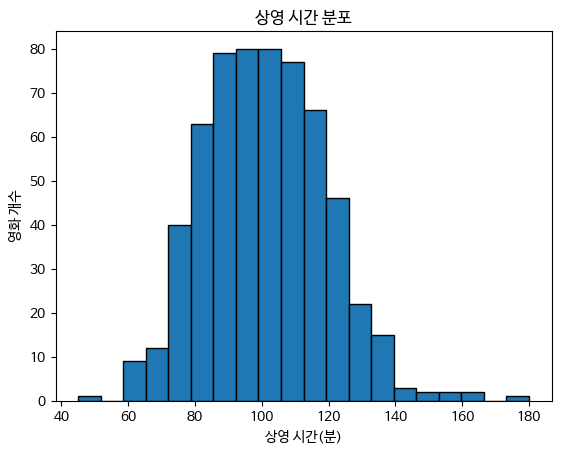

In [56]:
plt.hist(train.time,bins=20,edgecolor='black')
plt.xlabel("상영 시간(분)")
plt.ylabel("영화 개수")
plt.title("상영 시간 분포")
plt.show()

1. 대부분의 영화가 80 ~ 120분 사이에 분포한다.

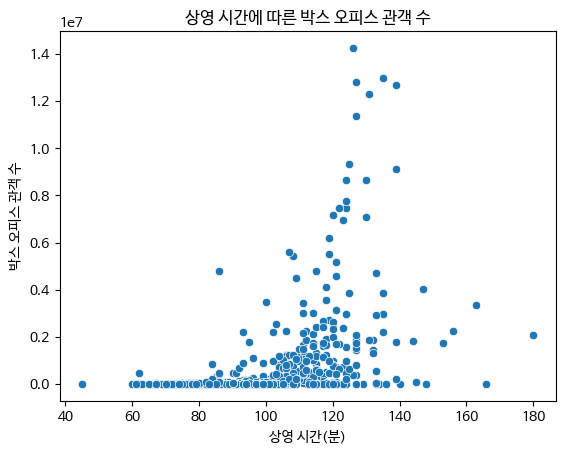

In [60]:
sns.scatterplot(x='time',y='box_off_num',data=train)
plt.xlabel("상영 시간(분)")
plt.ylabel("박스 오피스 관객 수")
plt.title("상영 시간에 따른 박스 오피스 관객 수")
plt.show()

In [62]:
print(train[['time','box_off_num']].corr())

                 time  box_off_num
time         1.000000     0.441452
box_off_num  0.441452     1.000000


2. 상관계수 0.441452는 어느 정도 의미 있는 수준이다.

### 시간별로 구간을 나누자. 80 ~ 100 / 100 ~ 120 / 120 ~ 140 이후 평균 관객 수와 관객 수의 중앙값을 비교하자.

In [63]:
train3=train.copy()

In [72]:
train_time80100=train3[train3.time.between(80,99)]
train_time100120=train3[train3.time.between(100,119)]
train_time120140=train3[train3.time.between(120,139)]

In [73]:
mean_box80100=train_time80100.box_off_num.mean()
median_box80100=train_time80100.box_off_num.median()

mean_box100120=train_time100120.box_off_num.mean()
median_box100120=train_time100120.box_off_num.median()

mean_box120140=train_time120140.box_off_num.mean()
median_box120140=train_time120140.box_off_num.median()

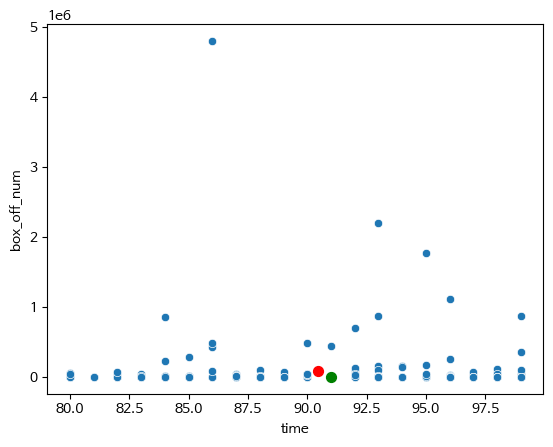

In [70]:
sns.scatterplot(x='time',y='box_off_num',data=train_time80100)
plt.scatter(train_time80100.time.mean(),mean_box80100,color='red',s=50,)
plt.scatter(train_time80100.time.median(),median_box80100,color='green',s=50)
plt.show()

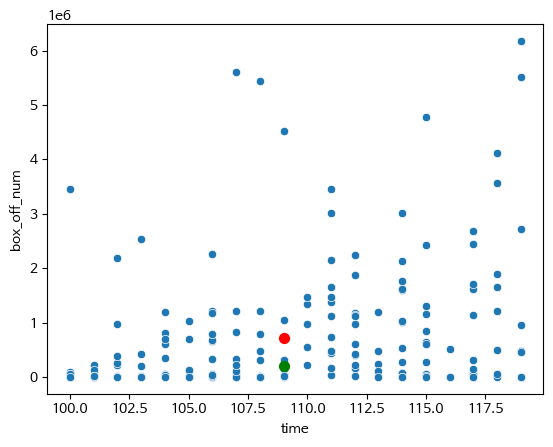

In [74]:
sns.scatterplot(x='time',y='box_off_num',data=train_time100120)
plt.scatter(train_time100120.time.mean(),mean_box100120,color='red',s=50,)
plt.scatter(train_time100120.time.median(),median_box100120,color='green',s=50)
plt.show()

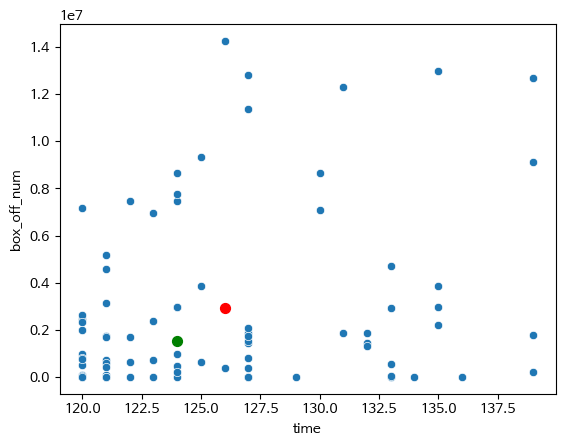

In [75]:
sns.scatterplot(x='time',y='box_off_num',data=train_time120140)
plt.scatter(train_time120140.time.mean(),mean_box120140,color='red',s=50,)
plt.scatter(train_time120140.time.median(),median_box120140,color='green',s=50)
plt.show()

### 세 개 합치기

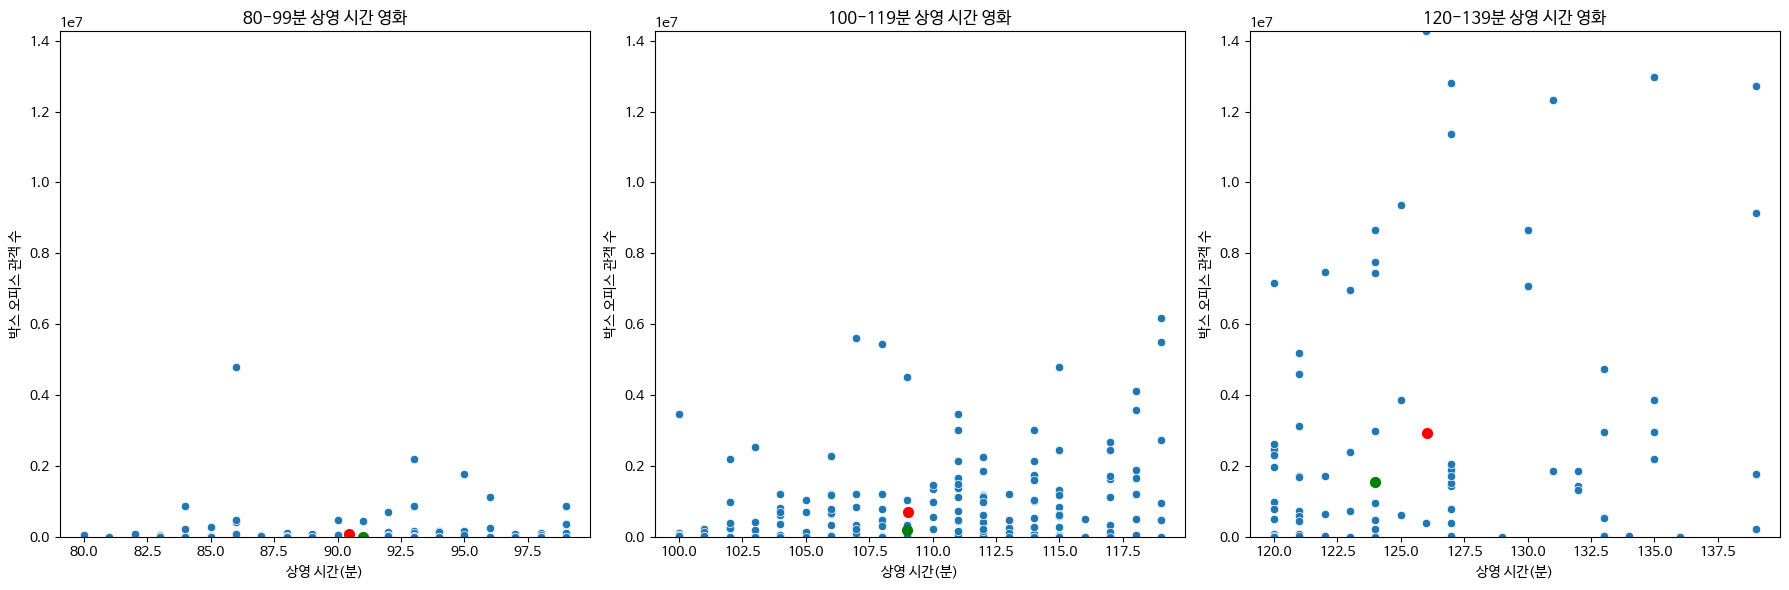

In [80]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # 1행 3열의 서브플롯 생성

# Determine a common y-axis limit
max_box_off = train.box_off_num.max()
y_limit = [0, max_box_off] # Set the lower limit to 0 and upper limit to the maximum box office number

# 80-99분 상영 시간 영화
sns.scatterplot(x='time',y='box_off_num',data=train_time80100, ax=axes[0])
axes[0].scatter(train_time80100.time.mean(),mean_box80100,color='red',s=50,)
axes[0].scatter(train_time80100.time.median(),median_box80100,color='green',s=50)
axes[0].set_title('80-99분 상영 시간 영화')
axes[0].set_xlabel("상영 시간(분)")
axes[0].set_ylabel("박스 오피스 관객 수")
axes[0].set_ylim(y_limit) # Set the y-axis limit

# 100-119분 상영 시간 영화
sns.scatterplot(x='time',y='box_off_num',data=train_time100120, ax=axes[1])
axes[1].scatter(train_time100120.time.mean(),mean_box100120,color='red',s=50,)
axes[1].scatter(train_time100120.time.median(),median_box100120,color='green',s=50)
axes[1].set_title('100-119분 상영 시간 영화')
axes[1].set_xlabel("상영 시간(분)")
axes[1].set_ylabel("박스 오피스 관객 수")
axes[1].set_ylim(y_limit) # Set the y-axis limit

# 120-139분 상영 시간 영화
sns.scatterplot(x='time',y='box_off_num',data=train_time120140, ax=axes[2])
axes[2].scatter(train_time120140.time.mean(),mean_box120140,color='red',s=50,)
axes[2].scatter(train_time120140.time.median(),median_box120140,color='green',s=50)
axes[2].set_title('120-139분 상영 시간 영화')
axes[2].set_xlabel("상영 시간(분)")
axes[2].set_ylabel("박스 오피스 관객 수")
axes[2].set_ylim(y_limit) # Set the y-axis limit


plt.tight_layout() # 그래프 간 간격 조절
plt.show()

1. 상영 시간이 증가할수록 박스 오피스의 관객 수도 증가하는 추세를 보인다.
2. 상영 시간이 120 ~ 139분일 때 박스 오피스 관객 수의 평균과 중앙값의 차이가 크다. 중앙값은 124분인 반면, 평균은 126분이다. 이 둘이 크게 차이가 나지는 않는다. **상영 시간이 증가할 때 박스 오피스의 평균 관객 수가 증가하기는 하지만 특정 상영 시간에 대한 지표로는 보기 힘들다.**

### 80 ~ 140분까지의 상영 시간에 대한 박스 오피스 관객 수에 대한 상관계수를 구해 보자.

In [83]:
train_time80140=train3[train3.time.between(80,140)]
train_time80140

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.00,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.00,0,431,4,2192525


In [84]:
print(train_time80140[['time','box_off_num']].corr())

                time  box_off_num
time         1.00000      0.47456
box_off_num  0.47456      1.00000


1. 전체 상관계수 0.441452 > 80 ~ 140 상관계수 **0.47456**

In [85]:
print(train_time80100[['time','box_off_num']].corr())

                 time  box_off_num
time         1.000000     0.008716
box_off_num  0.008716     1.000000


In [86]:
print(train_time100120[['time','box_off_num']].corr())

                 time  box_off_num
time         1.000000     0.310276
box_off_num  0.310276     1.000000


In [87]:
print(train_time120140[['time','box_off_num']].corr())

                 time  box_off_num
time         1.000000     0.231697
box_off_num  0.231697     1.000000


2. 상영 시간마다의 상관계수는 전체 상관계수에 비해 낮다. 즉 전체적일 때 더 상관이 있다고 볼 수 있다.

## 80 ~ 140분 데이터에 회귀선을 그려 보자

Text(0, 0.5, '박스오피스 관객 수')

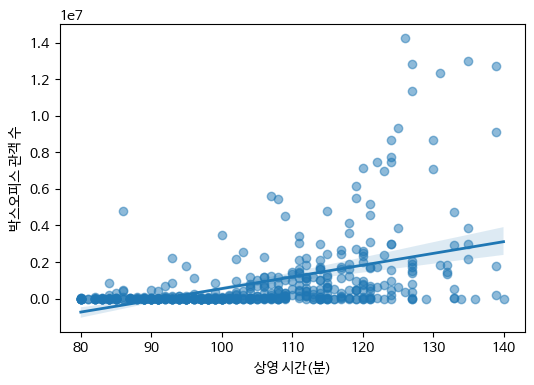

In [89]:
x,y='time','box_off_num'
# 산점도+회귀선
fig,ax=plt.subplots(figsize=(6,4))
sns.regplot(data=train_time80140,x=x,y=y,scatter_kws={'alpha':0.5},line_kws={'linewidth':2},ax=ax)
plt.xlabel("상영 시간(분)")
plt.ylabel("박스오피스 관객 수")

1. 증가하는 추세로 보이긴 한다. 자료의 수가 적어서 오차도 존재한다.

## 어떤 요소가 상영 시간을 크게 했는가?

1. 장르
2. 배급사?
3. 상영등급

### 1. 장르

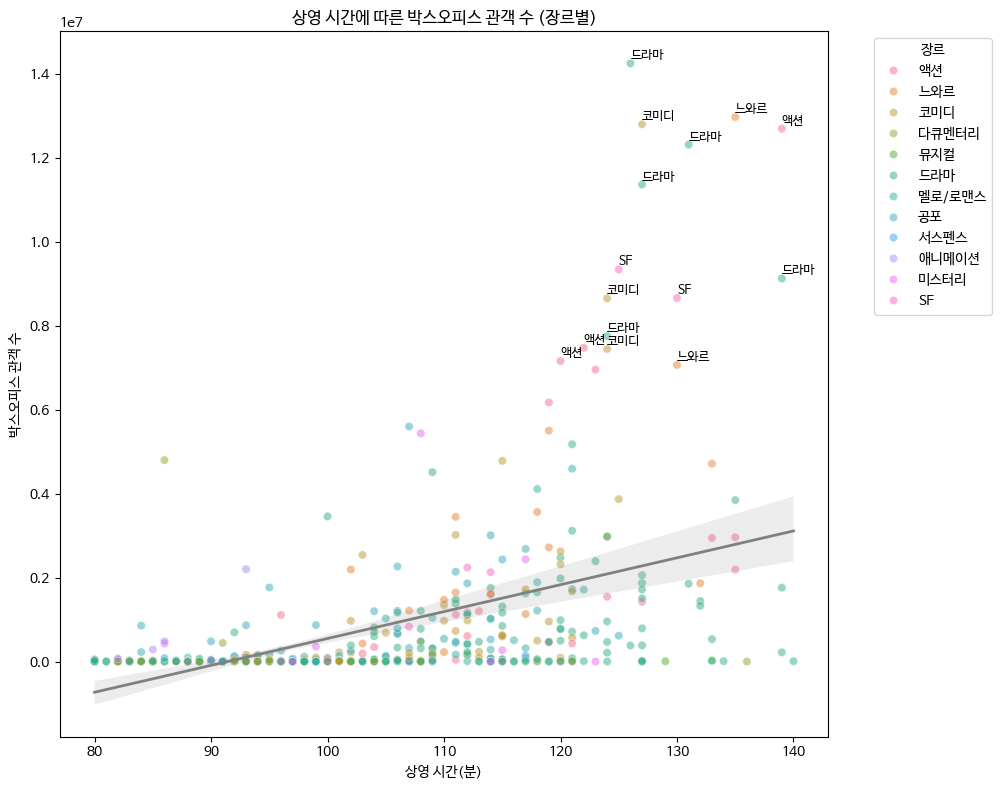

In [98]:
x,y='time','box_off_num'
# 산점도+회귀선 (장르별 색상)
fig,ax=plt.subplots(figsize=(12,8)) # Increase figure size for better readability with hue
sns.scatterplot(data=train_time80140,x=x,y=y,hue='genre',alpha=0.5,ax=ax) # Use scatterplot with hue
sns.regplot(data=train_time80140,x=x,y=y,scatter=False,line_kws={'linewidth':2},color='gray',ax=ax) # Overlay a single regression line

# Annotate the top 15 points by box_off_num with genre
top_15_box_off = train_time80140.nlargest(15, 'box_off_num')
for index, row in top_15_box_off.iterrows():
    plt.text(row['time'], row['box_off_num'], row['genre'], fontsize=9, ha='left', va='bottom')

plt.xlabel("상영 시간(분)")
plt.ylabel("박스오피스 관객 수")
plt.title("상영 시간에 따른 박스오피스 관객 수 (장르별)") # Update title
plt.legend(title='장르', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to prevent legend overlapping plot
plt.show()

### 2. 배급사

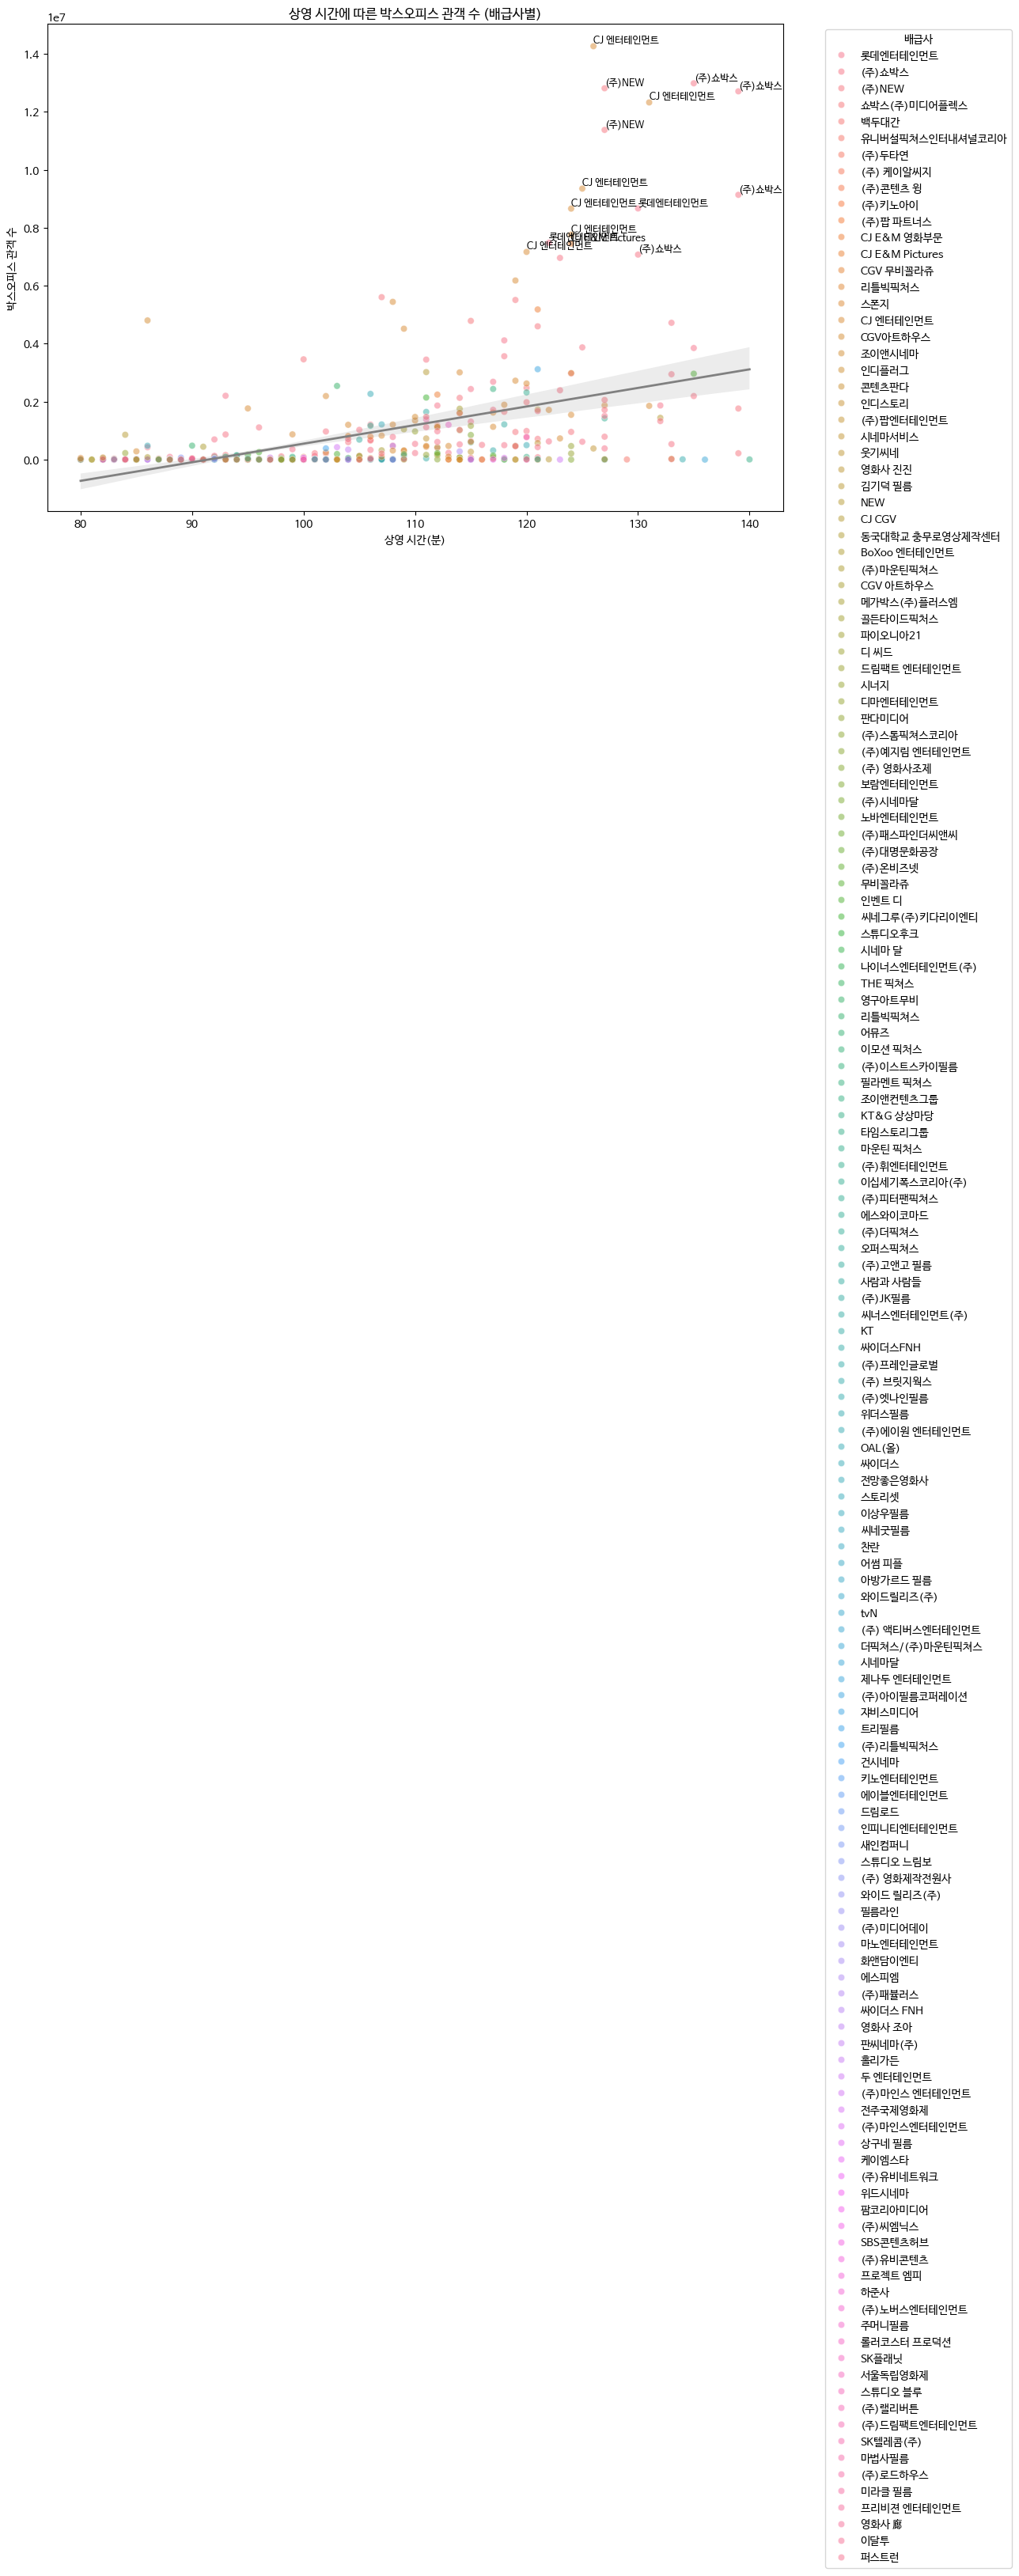

In [99]:
x,y='time','box_off_num'
# 산점도+회귀선 (배급사별 색상)
fig,ax=plt.subplots(figsize=(12,8)) # Increase figure size for better readability with hue
sns.scatterplot(data=train_time80140,x=x,y=y,hue='distributor',alpha=0.5,ax=ax) # Use scatterplot with hue
sns.regplot(data=train_time80140,x=x,y=y,scatter=False,line_kws={'linewidth':2},color='gray',ax=ax) # Overlay a single regression line

# Annotate the top 15 points by box_off_num with distributor
top_15_box_off = train_time80140.nlargest(15, 'box_off_num')
for index, row in top_15_box_off.iterrows():
    plt.text(row['time'], row['box_off_num'], row['distributor'], fontsize=9, ha='left', va='bottom')

plt.xlabel("상영 시간(분)")
plt.ylabel("박스오피스 관객 수")
plt.title("상영 시간에 따른 박스오피스 관객 수 (배급사별)") # Update title
plt.legend(title='배급사', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to prevent legend overlapping plot
plt.show()

### 3. 상영 등급

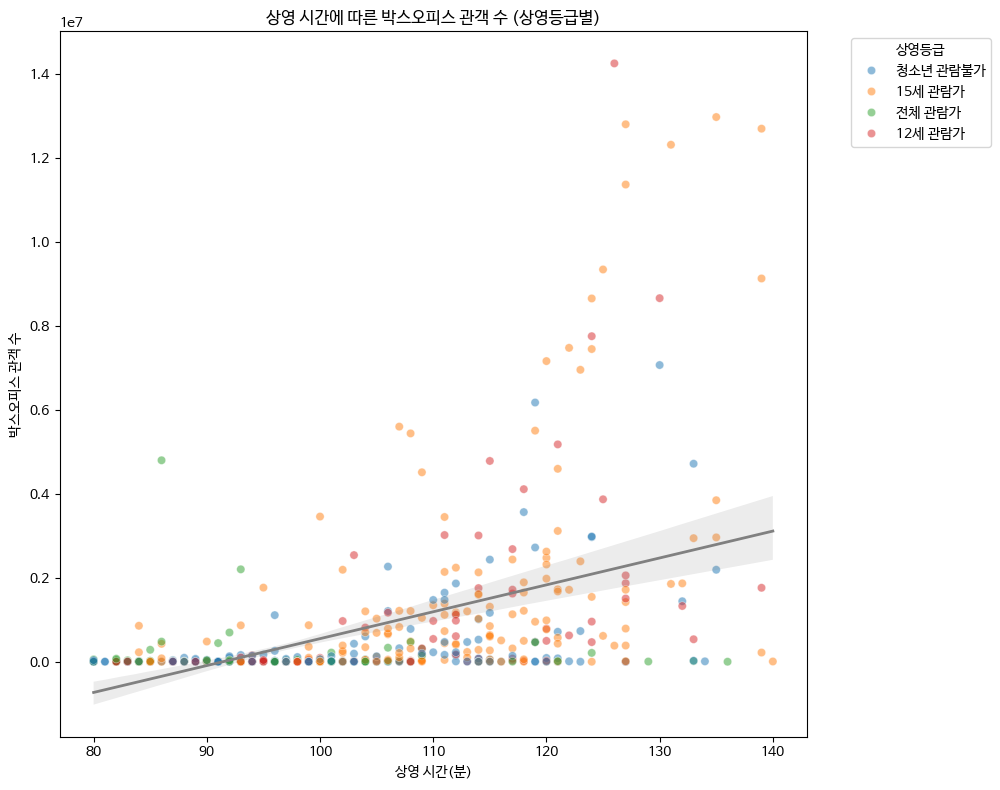

In [97]:
x,y='time','box_off_num'
# 산점도+회귀선 (상영등급별 색상)
fig,ax=plt.subplots(figsize=(12,8)) # Increase figure size for better readability with hue
sns.scatterplot(data=train_time80140,x=x,y=y,hue='screening_rat',alpha=0.5,ax=ax) # Use scatterplot with hue
sns.regplot(data=train_time80140,x=x,y=y,scatter=False,line_kws={'linewidth':2},color='gray',ax=ax) # Overlay a single regression line

plt.xlabel("상영 시간(분)")
plt.ylabel("박스오피스 관객 수")
plt.title("상영 시간에 따른 박스오피스 관객 수 (상영등급별)") # Update title
plt.legend(title='상영등급', bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to prevent legend overlapping plot
plt.show()

장르별 15개의 영화는 각각 드라마 5 / 코미디 3 / 액션 3 / 느와르 2 / SF 2 였다.
- 장르가 영향을 준다기보다는 큰 호불호 없이 볼 수 있는 장르에 대한 박스 오피스 수가 큰 것으로 보인다.

배급사별 15개의 영화는 각각 CJ 엔터테인먼트 6 / (주) 쇼박스 4 / (주) New 2 / 롯데엔터테인먼트 2 / CJ E&M Pictures 1이다.
- 대체로 대형 배급사의 영화들이 박스 오피스 관객 수가 크다.

상영등급별 영화의 박스 오피스 수가 큰 것들은 12세 관람가와 15세 관람가가 많다. 전체 관람가는 매우 적은 수이다.
- 12세 관람가와 15세 관람가가 많으며 이는 장르별에 따른 것처럼 큰 호불호 없이 볼 수 있는 것들이 많이 있기 때문으로 보인다.(청불의 경우에는 공포나 고어, 성인가의 로맨스 영화가 있으며, 전체 관람가의 경우 모두를 위한 영화라기보다는 12세, 15세 영화를 관람하지 못하는 어린이들을 위한 영화나 애니메이션이라 그 이상의 나이대는 잘 관람하지 않는다.)